In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle datasets download grassknoted/asl-alphabet

100% 1.02G/1.03G [00:06<00:00, 151MB/s]
100% 1.03G/1.03G [00:06<00:00, 174MB/s]


In [ ]:
!unzip asl-alphabet.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm
from IPython.display import Image, display

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import itertools

In [ ]:
train_path = '/content/asl_alphabet_train/asl_alphabet_train'
test_path = '/content/asl_alphabet_test/asl_alphabet_test'

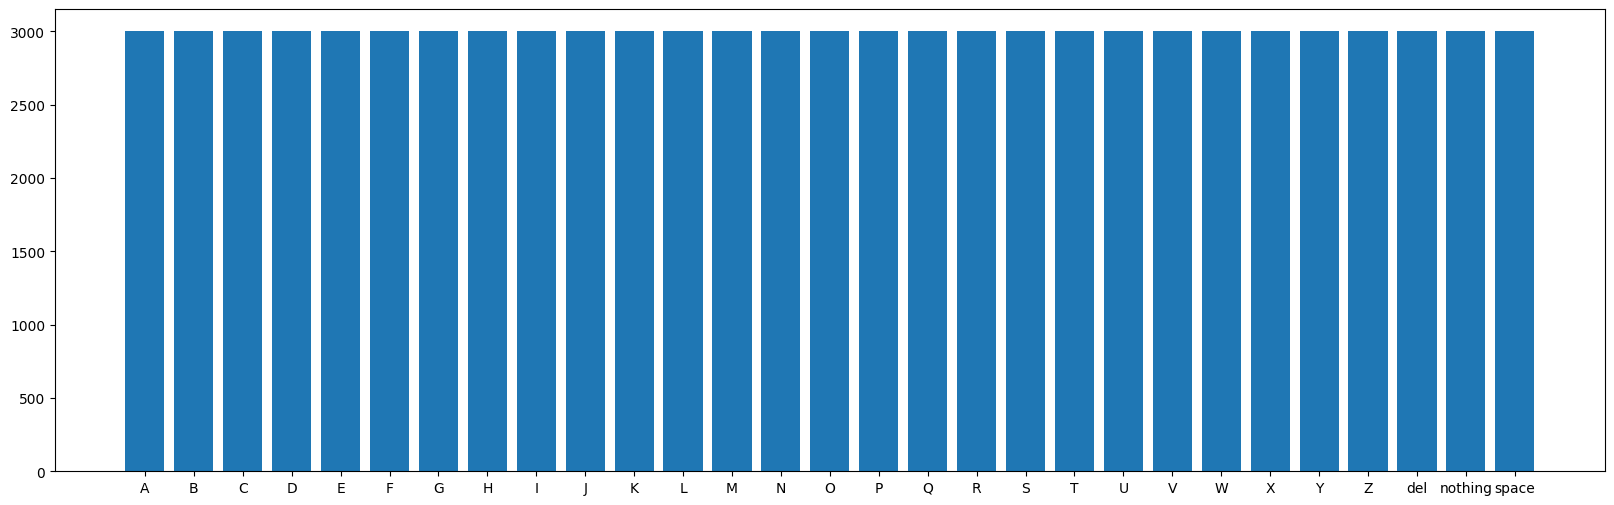

In [ ]:
classes = sorted(os.listdir(train_path))
numbers = []

for i in classes:
  numbers.append(len(os.listdir(train_path + '/' + i)))
  
plt.figure(figsize = (20,6))
plt.bar(classes, numbers)
plt.show()

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

A


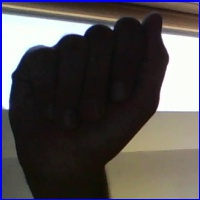

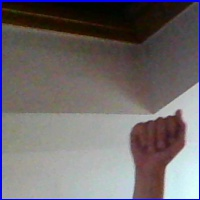

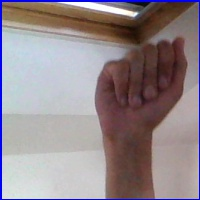

There are 3000 images in A class.

B


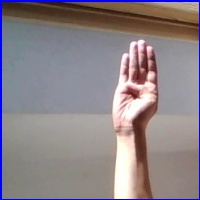

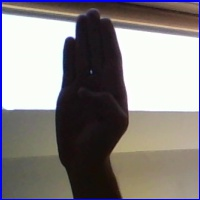

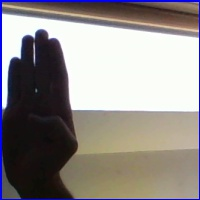

There are 3000 images in B class.

C


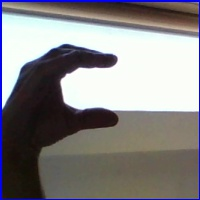

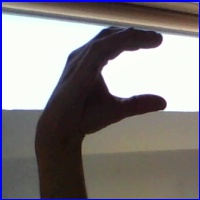

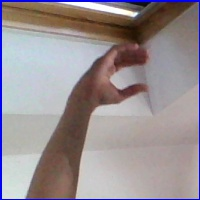

There are 3000 images in C class.

D


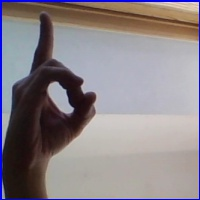

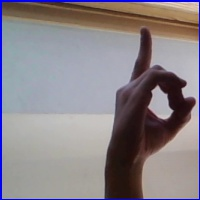

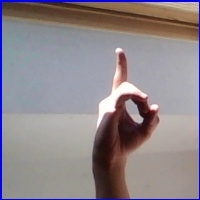

There are 3000 images in D class.

E


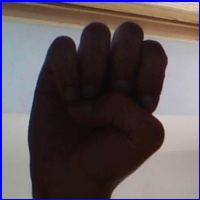

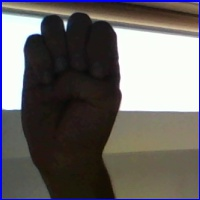

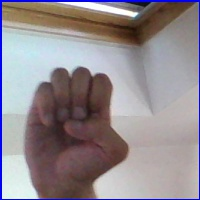

There are 3000 images in E class.

F


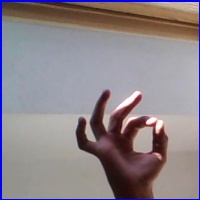

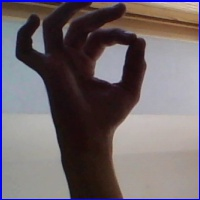

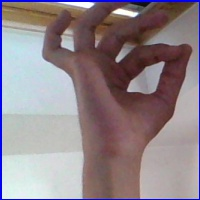

There are 3000 images in F class.

G


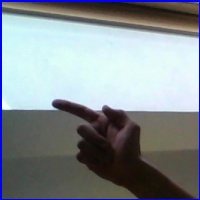

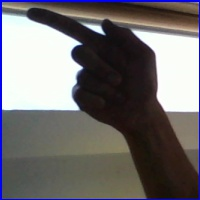

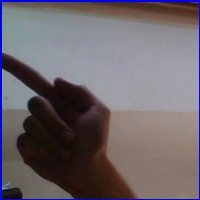

There are 3000 images in G class.

H


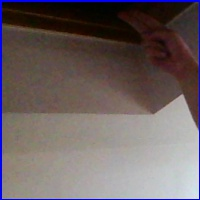

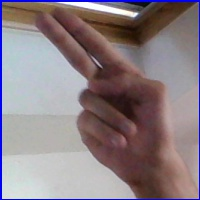

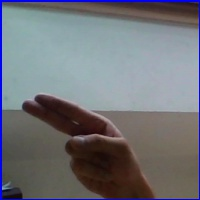

There are 3000 images in H class.

I


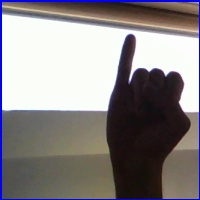

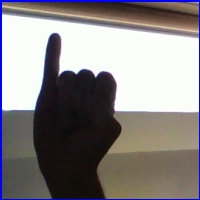

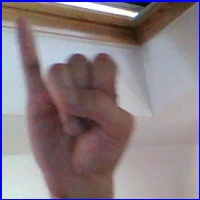

There are 3000 images in I class.

J


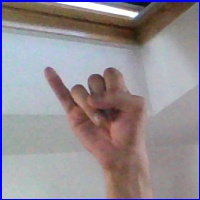

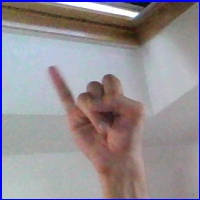

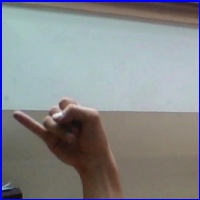

There are 3000 images in J class.

K


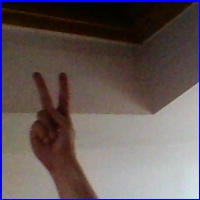

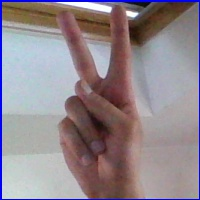

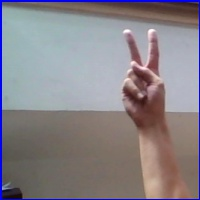

There are 3000 images in K class.

L


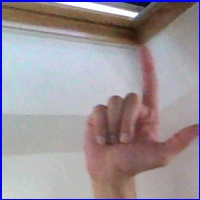

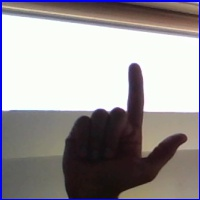

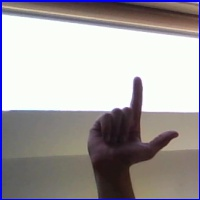

There are 3000 images in L class.

M


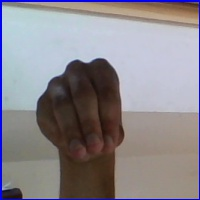

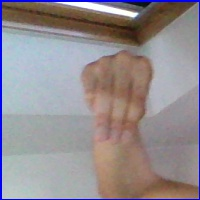

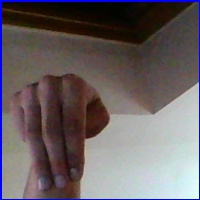

There are 3000 images in M class.

N


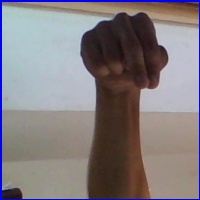

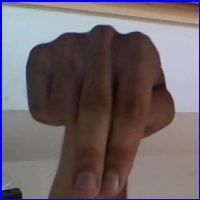

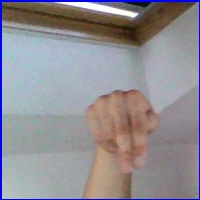

There are 3000 images in N class.

O


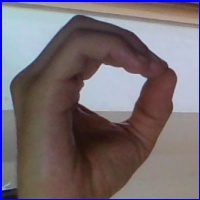

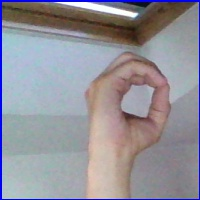

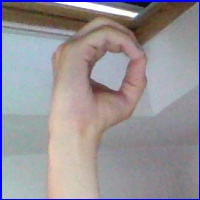

There are 3000 images in O class.

P


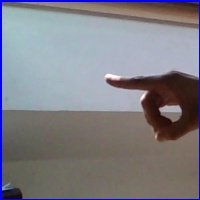

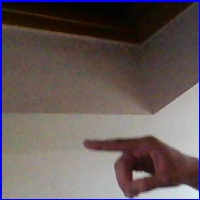

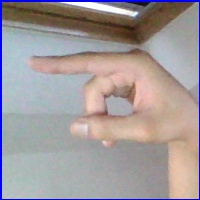

There are 3000 images in P class.

Q


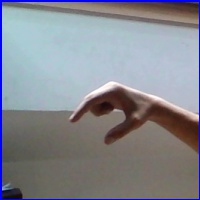

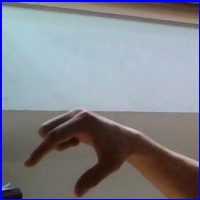

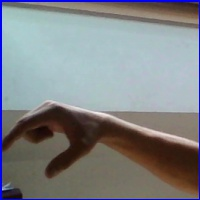

There are 3000 images in Q class.

R


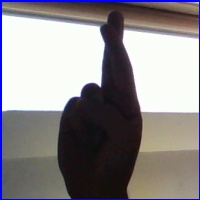

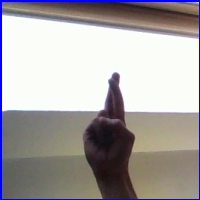

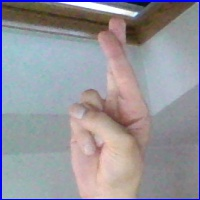

There are 3000 images in R class.

S


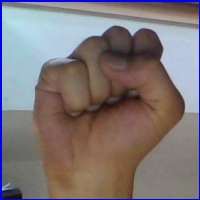

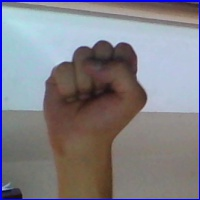

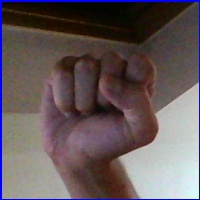

There are 3000 images in S class.

T


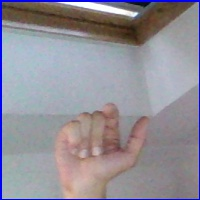

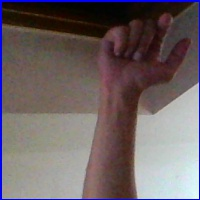

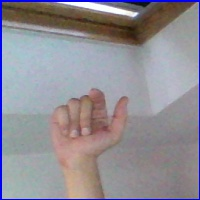

There are 3000 images in T class.

U


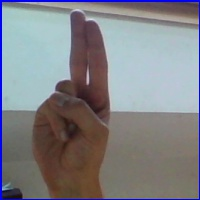

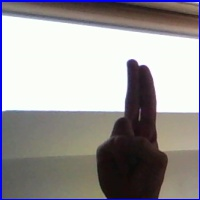

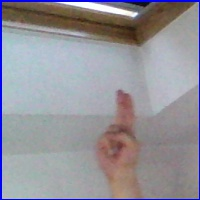

There are 3000 images in U class.

V


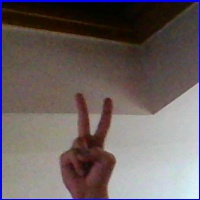

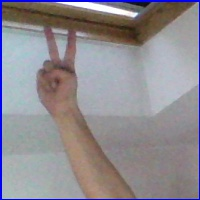

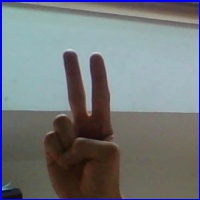

There are 3000 images in V class.

W


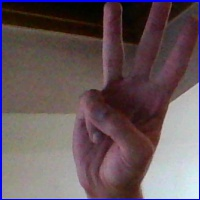

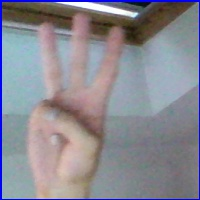

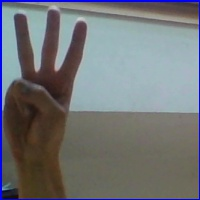

There are 3000 images in W class.

X


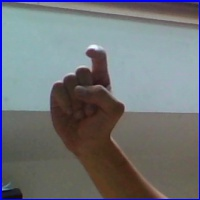

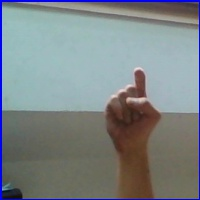

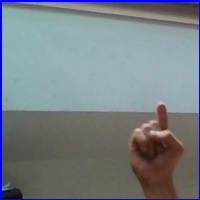

There are 3000 images in X class.

Y


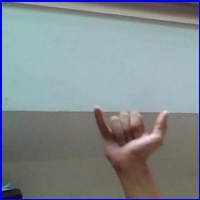

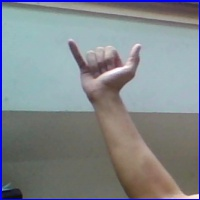

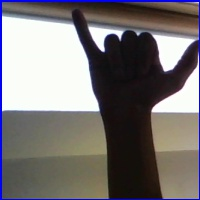

There are 3000 images in Y class.

Z


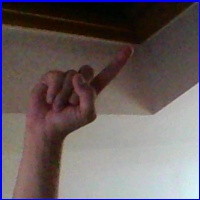

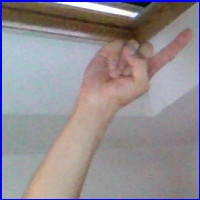

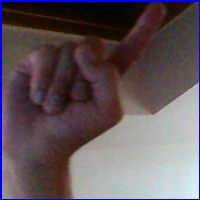

There are 3000 images in Z class.

del


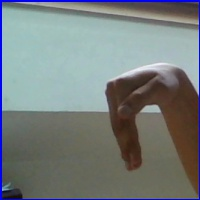

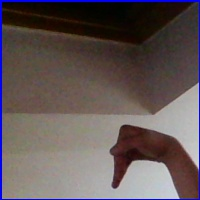

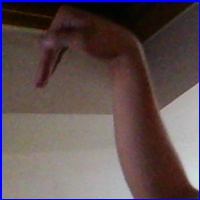

There are 3000 images in del class.

nothing


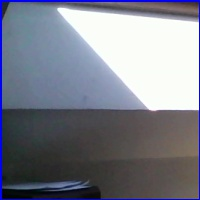

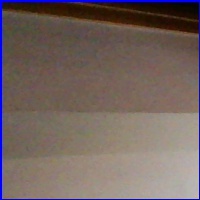

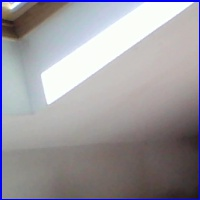

There are 3000 images in nothing class.

space


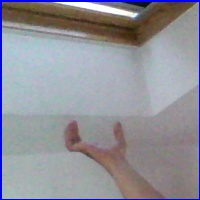

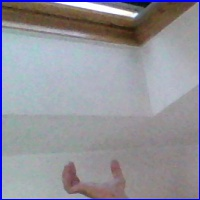

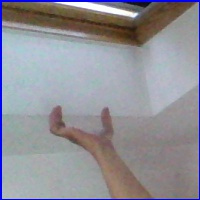

There are 3000 images in space class.


In [ ]:
labels = sorted(os.listdir(train_path))
print(labels)

for i in labels:
  path = train_path + '/' + i
  folder_data = os.listdir(path)
  k = 0
  print("")
  print(i)
  for image_path in folder_data:
    if k < 3:
      display(Image(path + '/' + image_path))
    k += 1
  print('There are', k, 'images in', i, 'class.')

In [ ]:
labels = sorted(os.listdir(train_path))
print(labels)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


In [ ]:
# trainsize = 200

training_data=[]
def create_training_data():
    for category in labels:
        # k = 0
        path = os.path.join(train_path, category)
        class_num=labels.index(category)
        for img in os.listdir(path):
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(32,32))
                training_data.append([new_array,class_num])
                # k += 1
                # if k >= trainsize:
                #   break

create_training_data()      

In [ ]:
print(len(training_data))

87000


In [ ]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(len(training_data),-1)

In [ ]:
X.shape

(87000, 3072)

In [ ]:
X = X/255.0

In [ ]:
y=np.array(y)

In [ ]:
y.shape

(87000,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

SGD

In [ ]:
from sklearn.linear_model import SGDClassifier
#sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

SGDClassifier()

In [ ]:
ysgd = sgd.predict(X_test)

In [ ]:
print("Accuracy is",accuracy_score(y_test, ysgd))

Accuracy is 0.7018850574712644


In [ ]:
print(classification_report(y_test,ysgd))

              precision    recall  f1-score   support

           0       0.88      0.66      0.76       739
           1       0.82      0.69      0.75       716
           2       0.70      0.88      0.78       772
           3       0.90      0.42      0.57       727
           4       0.75      0.67      0.71       728
           5       0.60      0.80      0.69       737
           6       0.92      0.61      0.74       739
           7       0.78      0.75      0.76       744
           8       0.84      0.81      0.83       749
           9       0.55      0.91      0.68       742
          10       0.77      0.79      0.78       760
          11       0.93      0.71      0.80       788
          12       0.80      0.70      0.75       802
          13       0.91      0.74      0.82       783
          14       0.98      0.23      0.37       744
          15       0.93      0.79      0.85       705
          16       0.76      0.96      0.85       717
          17       0.87    

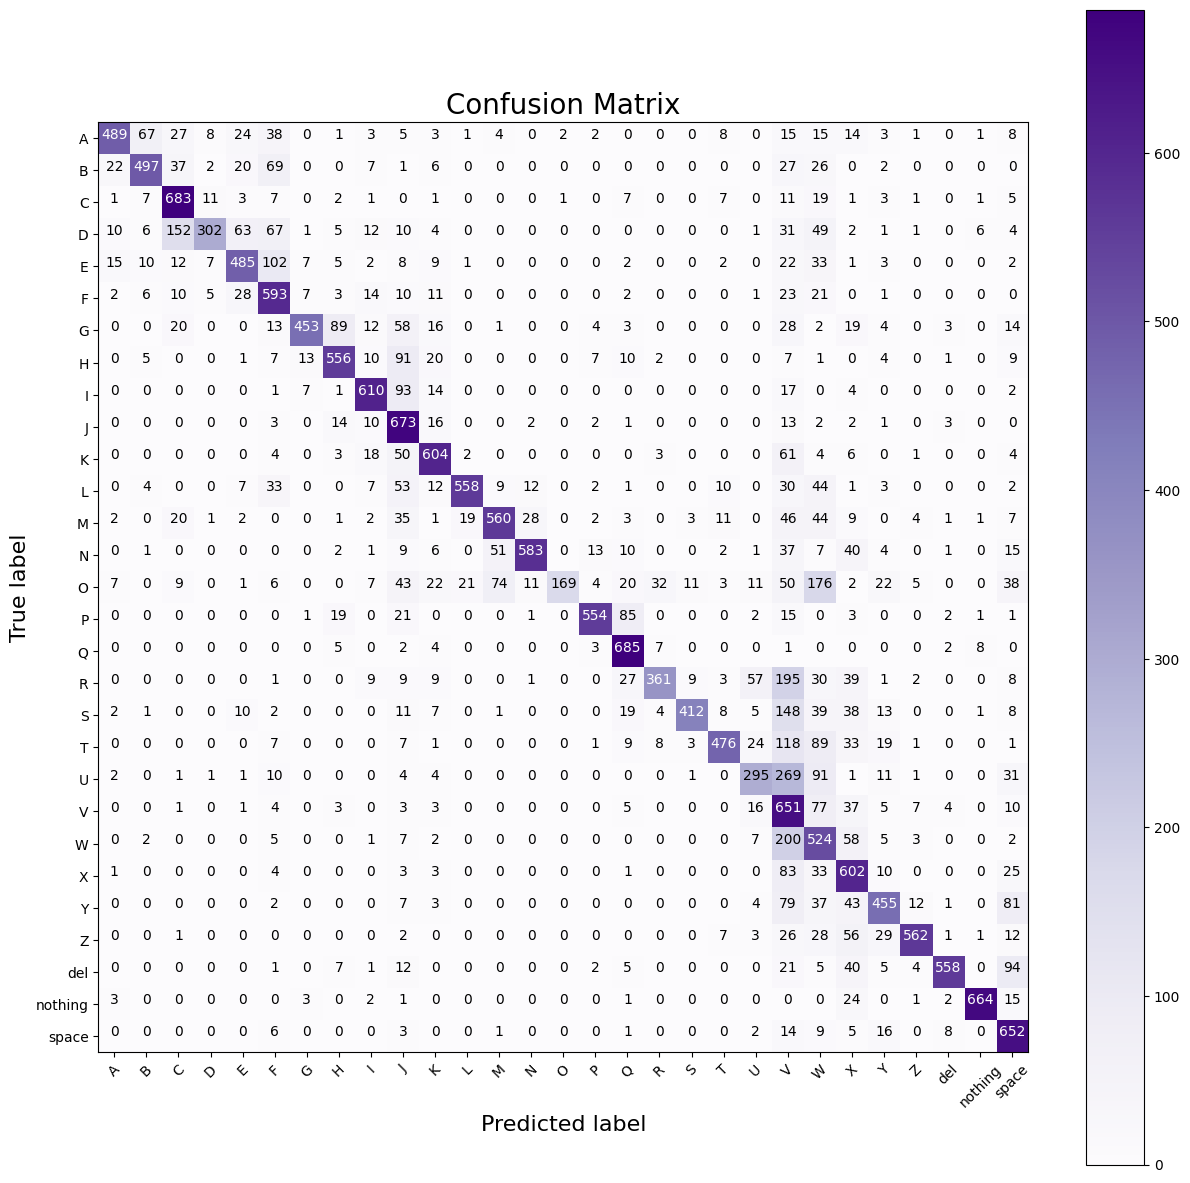

In [ ]:
def plot_confusion_matrix(y, y_pred):
  cm = confusion_matrix(y, y_pred)
  plt.figure(figsize = (15, 15))
  ax = plt.subplot()
  plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
  plt.colorbar()
  plt.title("Confusion Matrix")
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels, rotation=45)
  plt.yticks(tick_marks, labels)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ax.title.set_fontsize(20)
  ax.xaxis.label.set_fontsize(16)
  ax.yaxis.label.set_fontsize(16)
  limit = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
  plt.show()

plot_confusion_matrix(y_test, ysgd)

Hyperparameter Tuning

In [ ]:
sgdhype = SGDClassifier(alpha= 0.001, learning_rate= 'optimal', max_iter= 500)
sgdhype.fit(X_train, y_train)

SGDClassifier(alpha=0.001, max_iter=500)

In [ ]:
ysgdhype = sgdhype.predict(X_test)
print("Accuracy is",accuracy_score(y_test, ysgdhype))
print(classification_report(y_test,ysgdhype))

Accuracy is 0.6014712643678161
              precision    recall  f1-score   support

           0       0.84      0.45      0.59       739
           1       0.49      0.72      0.58       716
           2       0.47      0.91      0.62       772
           3       0.53      0.53      0.53       727
           4       0.92      0.18      0.31       728
           5       0.33      0.77      0.46       737
           6       0.80      0.63      0.70       739
           7       0.73      0.72      0.72       744
           8       0.96      0.46      0.62       749
           9       0.79      0.71      0.75       742
          10       0.61      0.79      0.69       760
          11       0.86      0.76      0.80       788
          12       0.86      0.37      0.52       802
          13       0.72      0.77      0.74       783
          14       0.92      0.50      0.65       744
          15       0.63      0.85      0.72       705
          16       0.60      0.83      0.70       

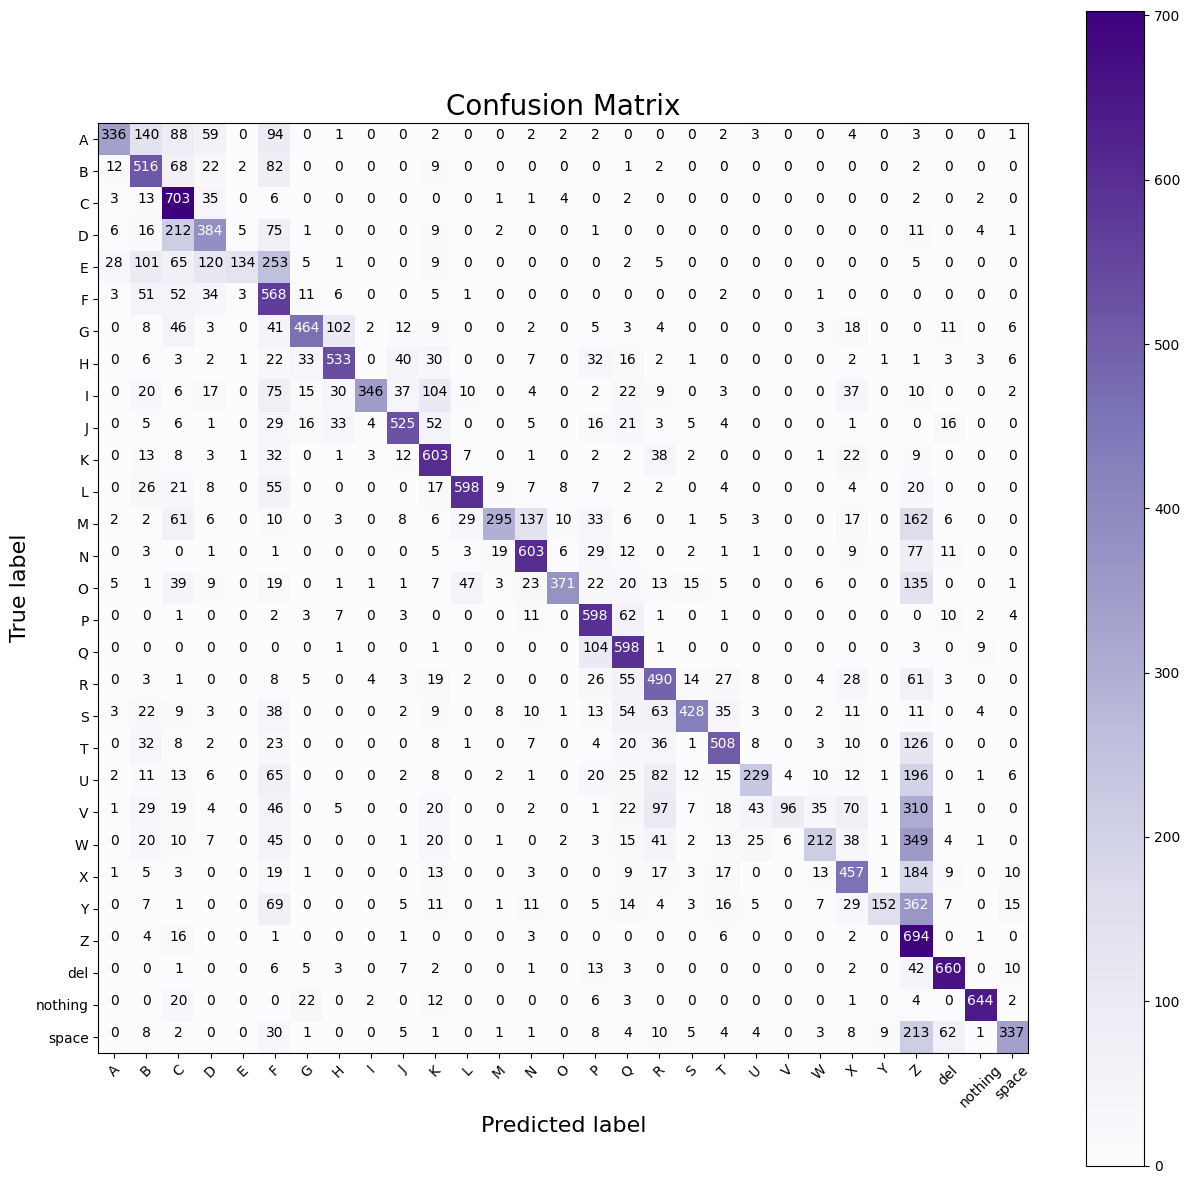

In [ ]:
def plot_confusion_matrix(y, y_pred):
  cm = confusion_matrix(y, y_pred)
  plt.figure(figsize = (15, 15))
  ax = plt.subplot()
  plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
  plt.colorbar()
  plt.title("Confusion Matrix")
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels, rotation=45)
  plt.yticks(tick_marks, labels)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ax.title.set_fontsize(20)
  ax.xaxis.label.set_fontsize(16)
  ax.yaxis.label.set_fontsize(16)
  limit = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
  plt.show()

plot_confusion_matrix(y_test, ysgdhype)

In [ ]:
# params_rand = {
#     'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
#     'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
#     'max_iter': [100, 500, 1000]
# }

# grid_search_sgd = GridSearchCV(SGDClassifier(), param_grid=params_rand, refit=True, cv=5, n_jobs=-1, scoring='accuracy')

# grid_search_sgd.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
225 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py", line 892, in fit
    self._more_validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py", line 149, in _more_validate_params
    raise ValueError("eta0 must be > 0")
V

GridSearchCV(cv=5, estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'max_iter': [100, 500, 1000]},
             scoring='accuracy')

In [ ]:
ysgdgrid = grid_search_sgd.predict(X_test)

In [ ]:
print("Accuracy is",accuracy_score(y_test, ysgdgrid))

Accuracy is 0.44620689655172413


In [ ]:
print(classification_report(y_test,ysgdgrid))

              precision    recall  f1-score   support

           0       0.81      0.29      0.43        58
           1       0.45      0.46      0.46        52
           2       0.77      0.73      0.75        59
           3       0.45      0.34      0.39        53
           4       0.40      0.09      0.14        46
           5       0.31      0.66      0.42        58
           6       0.76      0.40      0.52        48
           7       0.71      0.54      0.61        56
           8       0.55      0.52      0.54        50
           9       0.86      0.38      0.53        47
          10       0.33      0.80      0.47        44
          11       0.68      0.65      0.67        52
          12       0.86      0.11      0.20        54
          13       0.88      0.44      0.59        52
          14       0.43      0.49      0.46        41
          15       0.68      0.44      0.54        43
          16       0.48      0.85      0.61        46
          17       0.67    

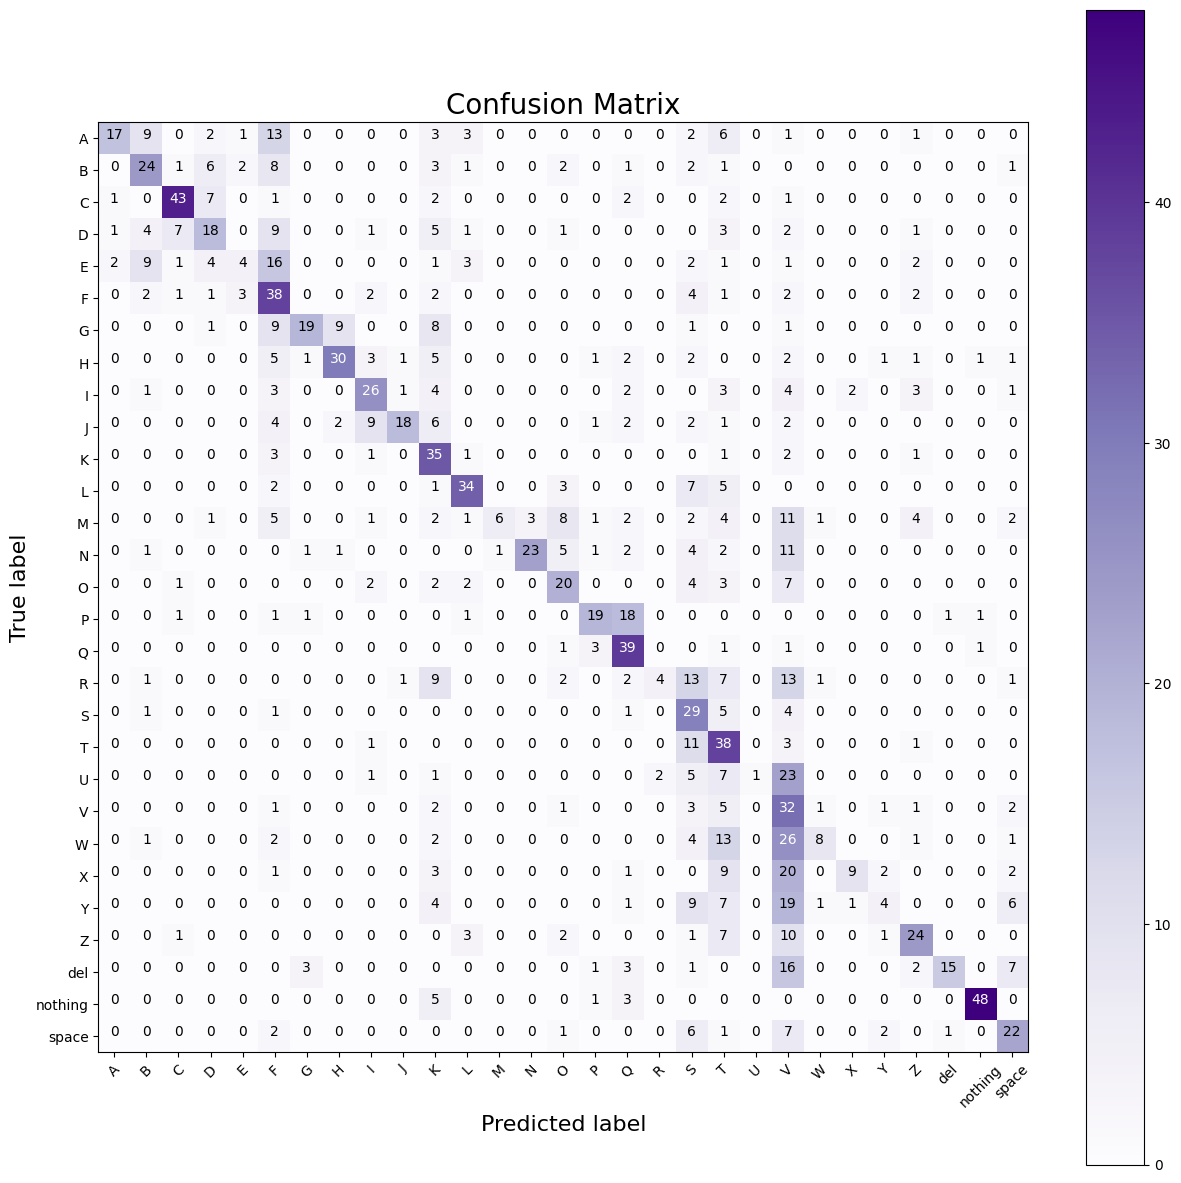

In [ ]:
def plot_confusion_matrix(y, y_pred):
  cm = confusion_matrix(y, y_pred)
  plt.figure(figsize = (15, 15))
  ax = plt.subplot()
  plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
  plt.colorbar()
  plt.title("Confusion Matrix")
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels, rotation=45)
  plt.yticks(tick_marks, labels)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ax.title.set_fontsize(20)
  ax.xaxis.label.set_fontsize(16)
  ax.yaxis.label.set_fontsize(16)
  limit = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
  plt.show()

plot_confusion_matrix(y_test, ysgdgrid)

In [ ]:
print(grid_search_sgd.best_params_)

{'alpha': 0.001, 'learning_rate': 'optimal', 'max_iter': 500}


In [ ]:
results = pd.DataFrame(grid_search_sgd.cv_results_)
results = results.sort_values(by='rank_test_score').head(10)
best_params = results[['params', 'mean_test_score']]

print(best_params)

                                               params  mean_test_score
16  {'alpha': 0.001, 'learning_rate': 'optimal', '...         0.383678
17  {'alpha': 0.001, 'learning_rate': 'optimal', '...         0.371724
4   {'alpha': 0.0001, 'learning_rate': 'optimal', ...         0.365057
15  {'alpha': 0.001, 'learning_rate': 'optimal', '...         0.364598
28  {'alpha': 0.01, 'learning_rate': 'optimal', 'm...         0.363678
27  {'alpha': 0.01, 'learning_rate': 'optimal', 'm...         0.357701
29  {'alpha': 0.01, 'learning_rate': 'optimal', 'm...         0.349655
3   {'alpha': 0.0001, 'learning_rate': 'optimal', ...         0.344138
5   {'alpha': 0.0001, 'learning_rate': 'optimal', ...         0.318391
39  {'alpha': 0.1, 'learning_rate': 'optimal', 'ma...         0.283908
